# Homework 3: Unsupervised Learning

Due Wednesday 11/24 at 11:59 pm EST

In this notebook, we will be applying unsupervised learning approaches to a problem in computational biology. Specifically, we will be analyzing single-cell genomic sequencing data. Single-cell genomics is a set of revolutionary new technologies which can profile the genome of a specimen (tissue, blood, etc.) at the resolution of individual cells. This increased granularity can help capture intercellular heterogeneity, key to better understanding and treating complex genetic diseases such as cancer and Alzheimer's. 

<img src="https://cdn.10xgenomics.com/image/upload/v1574196658/blog/singlecell-v.-bulk-image.png" width="800px"/>

<center>Source: 10xgenomics.com/blog/single-cell-rna-seq-an-introductory-overview-and-tools-for-getting-started</center>

A common challenge of genomic datasets is their high-dimensionality: a single observation (a cell, in the case of single-cell data) may have tens of thousands of gene expression features. Fortunately, biology offers a lot of structure - different genes work together in pathways and are co-regulated by gene regulatory networks. Unsupervised learning is widely used to discover this intrinsic structure and prepare the data for further analysis.

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

## Dataset: single-cell RNASeq of mouse brain cells

We will be working with a single-cell RNASeq dataset of mouse brain cells. In the following gene expression matrix, each row represents a cell and each column represents a gene. Each entry in the matrix is a normalized gene expression count - a higher value means that the gene is expressed more in that cell. The dataset has been pre-processed using various quality control and normalization methods for single-cell data. 

Data source: https://chanzuckerberg.github.io/scRNA-python-workshop/preprocessing/00-tabula-muris.html

In [5]:
cell_gene_counts_df = pd.read_csv('data/mouse_brain_cells_gene_counts.csv', index_col='cell')
cell_gene_counts_df

,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610009B14Rik,0610009B22Rik,0610009D07Rik,...,Zwint,Zxda,Zxdb,Zxdc,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6
cell,,,,,,,,,,,,,,,,,,,,,
A1.B003290.3_38_F.1.1,-0.08093,0.7856,1.334,-0.2727,-0.4153,-0.8310,-0.4692,-0.03146,-0.6035,-1.021000,...,-0.7227,-0.2145,-0.1927,-0.4163,-0.5923,-0.5913,-0.553,-0.5654,-0.04385,1.567
A1.B003728.3_56_F.1.1,-0.08093,-1.4840,-0.576,-0.2727,-0.4153,1.8350,-0.4692,-0.03146,-0.6035,-1.021000,...,-0.7227,-0.2145,-0.1927,-0.4163,-0.5923,-0.5913,-0.553,-0.5654,-0.04385,-0.681
A1.MAA000560.3_10_M.1.1,-0.08093,0.6300,-0.576,-0.2727,-0.4153,-0.2084,-0.4692,-0.03146,-0.6035,1.253000,...,1.3150,-0.2145,-0.1927,-0.4163,-0.5923,-0.5913,2.072,-0.5654,-0.04385,1.260
A1.MAA000564.3_10_M.1.1,-0.08093,0.3809,1.782,-0.2727,-0.4153,1.0300,-0.4692,-0.03146,1.2640,-1.021000,...,-0.7227,-0.2145,-0.1927,-0.4163,-0.5923,2.3900,-0.553,0.1697,-0.04385,-0.681
A1.MAA000923.3_9_M.1.1,-0.08093,0.5654,-0.576,-0.2727,-0.4153,-0.8310,-0.4692,-0.03146,-0.6035,-1.021000,...,-0.7227,-0.2145,-0.1927,-0.4163,2.3180,-0.5913,-0.553,-0.5654,-0.04385,-0.681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E2.MAA000902.3_11_M.1.1,14.98400,1.1550,-0.576,-0.2727,-0.4153,0.7530,-0.4692,-0.03146,-0.6035,-1.021000,...,1.4260,-0.2145,-0.1927,-0.4163,-0.5923,-0.5913,-0.553,-0.5654,-0.04385,1.728
E2.MAA000926.3_9_M.1.1,-0.08093,-1.4840,-0.576,-0.2727,-0.4153,1.4720,-0.4692,-0.03146,1.8120,1.079000,...,-0.7227,-0.2145,-0.1927,-0.4163,0.2422,-0.5913,-0.553,1.6060,-0.04385,-0.681
E2.MAA000932.3_11_M.1.1,-0.08093,0.5703,-0.576,-0.2727,-0.4153,-0.8310,-0.4692,-0.03146,-0.6035,-0.003473,...,-0.7227,-0.2145,-0.1927,-0.4163,-0.5923,-0.5913,-0.553,-0.5654,-0.04385,2.074


Note the dimensionality - we have 1000 cells (observations) and 18,585 genes (features)!

We are also provided a metadata file with annotations for each cell (e.g. cell type, subtissue, mouse sex, etc.)

In [6]:
cell_metadata_df = pd.read_csv('data/mouse_brain_cells_metadata.csv')
cell_metadata_df

,cell,cell_ontology_class,subtissue,mouse.sex,mouse.id,plate.barcode,n_genes,n_counts
0,A1.B003290.3_38_F.1.1,astrocyte,Striatum,F,3_38_F,B003290,3359,390075.0
1,A1.B003728.3_56_F.1.1,astrocyte,Striatum,F,3_56_F,B003728,1718,776436.0
2,A1.MAA000560.3_10_M.1.1,oligodendrocyte,Cortex,M,3_10_M,MAA000560,3910,1616084.0
3,A1.MAA000564.3_10_M.1.1,endothelial cell,Striatum,M,3_10_M,MAA000564,4352,360004.0
4,A1.MAA000923.3_9_M.1.1,astrocyte,Hippocampus,M,3_9_M,MAA000923,2248,290282.0
...,...,...,...,...,...,...,...,...
995,E2.MAA000902.3_11_M.1.1,astrocyte,Striatum,M,3_11_M,MAA000902,3026,3134463.0
996,E2.MAA000926.3_9_M.1.1,oligodendrocyte,Cortex,M,3_9_M,MAA000926,3085,744301.0
997,E2.MAA000932.3_11_M.1.1,endothelial cell,Hippocampus,M,3_11_M,MAA000932,2277,519257.0
998,E2.MAA000944.3_9_M.1.1,oligodendrocyte,Cortex,M,3_9_M,MAA000944,3234,1437895.0


Different cell types

In [4]:
cell_metadata_df['cell_ontology_class'].value_counts()

oligodendrocyte                   385
endothelial cell                  264
astrocyte                         135
neuron                             94
brain pericyte                     58
oligodendrocyte precursor cell     54
Bergmann glial cell                10
Name: cell_ontology_class, dtype: int64

Different subtissue types (parts of the brain)

In [5]:
cell_metadata_df['subtissue'].value_counts()

Cortex         364
Hippocampus    273
Striatum       220
Cerebellum     143
Name: subtissue, dtype: int64

Our goal in this exercise is to use dimensionality reduction and clustering to visualize and better understand the high-dimensional gene expression matrix. We will use the following pipeline, which is common in single-cell analysis:
1. Use PCA to project the gene expression matrix to a lower-dimensional linear subspace.
2. Cluster the data using K-means on the first 20 principal components.
3. Use t-SNE to project the first 20 principal components onto two dimensions. Visualize the points and color by their clusters from (2).

## Part 1: PCA

**Perform PCA and project the gene expression matrix onto its first 50 principal components. You may use `sklearn.decomposition.PCA`.**

In [289]:
### Your code here
# scaler = StandardScaler()
# cell_gene_counts_scaled = scaler.fit_transform(cell_gene_counts_df)
pca = PCA(n_components = 50)
cell_gene_counts_pca = pca.fit_transform(cell_gene_counts_df)
cell_gene_counts_pca.shape

(1000, 50)

**Plot the cumulative proportion of variance explained as a function of the number of principal components. How much of the total variance in the dataset is explained by the first 20 principal components?**

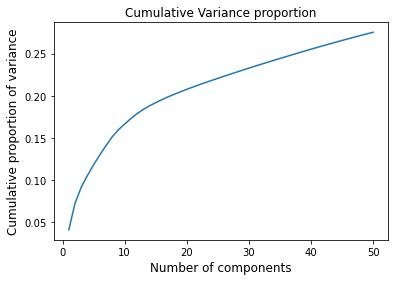

In [306]:
### Your code here
# def plot_cvariance_distribution(n_components):
#     pca = PCA(n_components=n_components)
#     cell_gene_counts_pca = pca.fit_transform(cell_gene_counts_scaled)
plt.plot(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_.cumsum())
plt.xlabel('Number of components',fontsize=12)
plt.ylabel('Cumulative proportion of variance',fontsize=12)
plt.title('Cumulative Variance proportion')
plt.show()
    


In [291]:
n_component = 20
pca.explained_variance_ratio_.cumsum()[n_component-1]

0.20765364406606096

Hence roughly 20.765 % of the components are explained by the PCA

**For the first principal component, report the top 10 loadings (weights) and their corresponding gene names.** In other words, which 10 genes are weighted the most in the first principal component?

In [310]:
### Your code here
#indexes = np.argpartition(pca.components_.T[:,0],-10)[-10:]
indexes_1 = np.argsort(pca.components_.T[:,0])[-10:]
indexes_1

array([ 6068, 11719,  4539,  8555,  3399, 13704,  9219, 13433, 15847,
       11730])

In [313]:
cell_names = cell_gene_counts_df.columns[indexes_1]
print('Top 10 Loading weights are as follows:')
for cell in cell_names:
    print(cell)

Top 10 Loading weights are as follows:
Erc2
Nrsn2
Cpne5
Hpca
Camkv
Rasgef1a
Kcnj4
Ptpn5
St8sia3
Nsg2


**Plot the projection of the data onto the first two principal components using a scatter plot.**

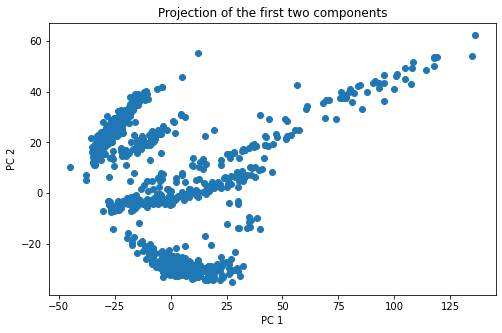

In [314]:
### Your code here
plt.figure(figsize=(8,5))
plt.scatter(cell_gene_counts_pca[:,0],cell_gene_counts_pca[:,1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Projection of the first two components')
plt.show()

**Now, use a small multiple of four scatter plots to make the same plot as above, but colored by four annotations in the metadata: cell_ontology_class, subtissue, mouse.sex, mouse.id. Include a legend for the labels.** For example, one of the plots should have points projected onto PC 1 and PC 2, colored by their cell_ontology_class.

In [315]:
def get_key(dictionary,val):
    for key in dictionary.keys():
        if dictionary[key] == val:
            return key
    

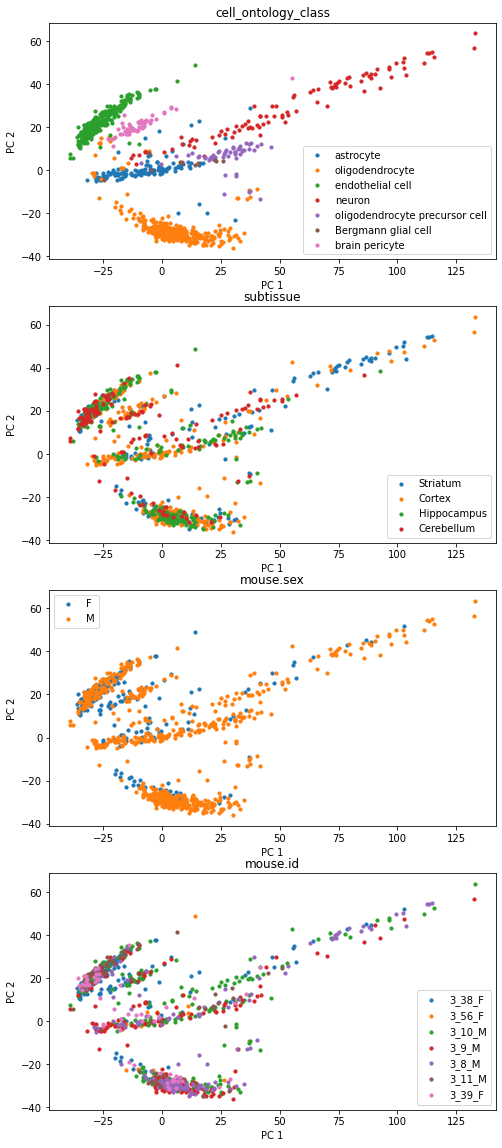

In [286]:
### Your code here
features = ['cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id']
plt.figure(figsize=(8,20))
for i in range(len(features)):
    feature = features[i]
    plt.subplot(len(features),1,i+1)
    unique_labels = cell_metadata_df[feature].unique()
    unique_labels = {c:i for i,c in enumerate(unique_labels)}
    labels = [unique_labels[x] for x in list(cell_metadata_df[feature])]
    for classes in set(labels):
        selected_indexes = np.array([l for l,element in enumerate(labels) if element==classes])
        plt.scatter(cell_gene_counts_pca[:,0][selected_indexes],cell_gene_counts_pca[:,1][selected_indexes],label=get_key(unique_labels,classes),s=10)
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.title(feature)
    plt.legend()
plt.show()

**Based on the plots above, the first two principal components correspond to which aspect of the cells? What is the intrinsic dimension that they are describing?**

The first 2 components are very well aligned with the cell ontology class and hence correspond to the cell ontology class dimension

## Part 2: K-means

While the annotations provide high-level information on cell type (e.g. cell_ontology_class has 7 categories), we may also be interested in finding more granular subtypes of cells. To achieve this, we will use K-means clustering to find a large number of clusters in the gene expression dataset. Note that the original gene expression matrix had over 18,000 noisy features, which is not ideal for clustering. So, we will perform K-means clustering on the first 20 principal components of the dataset.

**Implement a `kmeans` function which takes in a dataset `X` and a number of clusters `k`, and returns the cluster assignment for each point in `X`. You may NOT use sklearn for this implementation. Use lecture 6, slide 14 as a reference.**

In [283]:
def distance(x,y):
    rms_val = np.zeros(x.shape[0],)
    for index in range(x.shape[0]):
        value = np.linalg.norm(x[index,:]-y[index,:])
        rms_val[index] = value
    return np.argmin(rms_val)
    #return np.sqrt(np.sum((x-y)**2,axis=1))


def kmeans(X, k, iters=10):
    '''Groups the points in X into k clusters using the K-means algorithm.

    Parameters
    ----------
    X : (m x n) data matrix
    k: number of clusters
    iters: number of iterations to run k-means loop

    Returns
    -------
    y: (m x 1) cluster assignment for each point in X
    '''
    random_indices = np.random.choice(X.shape[0], size=k, replace=False)
    cluster_data_points = X[random_indices,:]
    for _ in range(iters):
        cluster_array = np.zeros(X.shape[0],)
        for index in range(X.shape[0]):
            row = X[index]
            data_matrix = np.array([row for __ in range(k)])
            chosen_cluster = distance(cluster_data_points,data_matrix)
            cluster_array[index] = chosen_cluster
        for i in range(k):
            cluster_data_indices= np.where(np.array(cluster_array)==i)            
            cluster_data_points[i,:]= np.mean(X[cluster_data_indices],axis=0)
    return cluster_array    
            
    ### Your code here

Before applying K-means on the gene expression data, we will test it on the following synthetic dataset to make sure that the implementation is working.

Text(0, 0.5, '$x_2$')

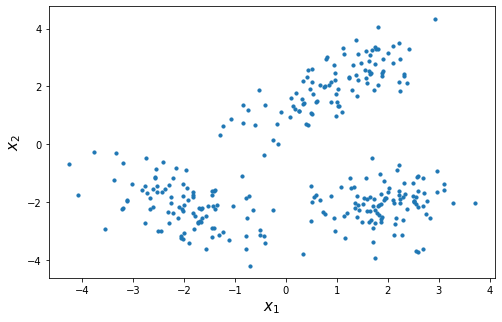

In [254]:
np.random.seed(0)
x_1 = np.random.multivariate_normal(mean=[1, 2], cov=np.array([[0.8, 0.6], [0.6, 0.8]]), size=100)
x_2 = np.random.multivariate_normal(mean=[-2, -2], cov=np.array([[0.8, -0.4], [-0.4, 0.8]]), size=100)
x_3 = np.random.multivariate_normal(mean=[2, -2], cov=np.array([[0.4, 0], [0, 0.4]]), size=100)
X = np.vstack([x_1, x_2, x_3])

plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)

**Apply K-means with k=3 to the synthetic dataset above. Plot the points colored by their K-means cluster assignments to verify that your implementation is working.**

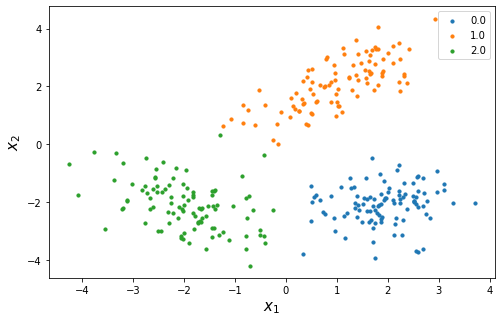

In [285]:
### Your code here
clusters = kmeans(X, 3, iters=50)
labels = set(clusters)
plt.figure(figsize=(8, 5))
for label in labels:
    selected_indexes = np.array([l for l,element in enumerate(clusters) if element==label])
    plt.scatter(X[:, 0][selected_indexes], X[:, 1][selected_indexes],label=label,s=10)
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)
plt.legend()
plt.show()

**Use K-means with k=20 to cluster the first 20 principal components of the gene expression data.**

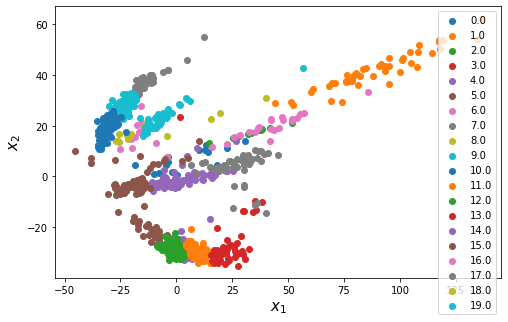

In [304]:
### Your code here
clusters = kmeans(cell_gene_counts_pca[:,:20], k = 20, iters=10)
labels = set(clusters)
plt.figure(figsize=(8, 5))
for label in labels:
    selected_indexes = np.array([l for l,element in enumerate(clusters) if element==label])
    plt.scatter(cell_gene_counts_pca[:, 0][selected_indexes], cell_gene_counts_pca[:, 1][selected_indexes],label=label)
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)
plt.legend()
plt.show()

## Part 3: t-SNE

In this final section, we will visualize the data again using t-SNE - a non-linear dimensionality reduction algorithm. You can learn more about t-SNE in this interactive tutorial: https://distill.pub/2016/misread-tsne/.

**Use t-SNE to reduce the first 20 principal components of the gene expression dataset to two dimensions. You may use `sklearn.manifold.TSNE`.** Note that it is recommended to first perform PCA before applying t-SNE to suppress noise and speed up computation.

In [204]:
### Your code here
from sklearn.manifold import TSNE
model = TSNE(n_components=2)
cell_gene_counts_tsne = model.fit_transform(cell_gene_counts_pca[:,:20])
cell_gene_counts_tsne.shape

/Users/rahulsubramaniam/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/rahulsubramaniam/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(1000, 2)

**Plot the data (first 20 principal components) projected onto the first two t-SNE dimensions.**

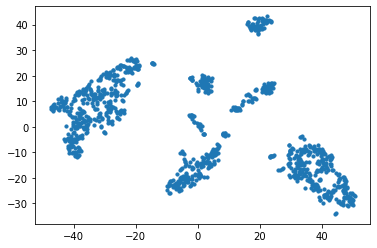

In [205]:
### Your code here
plt.scatter(cell_gene_counts_tsne[:,0],cell_gene_counts_tsne[:,1],s=10)
plt.show()

**Plot the data (first 20 principal components) projected onto the first two t-SNE dimensions, with points colored by their cluster assignments from part 2.**

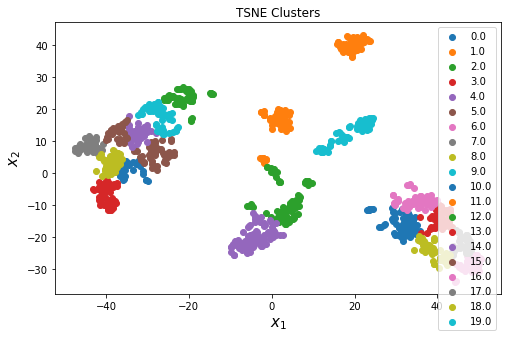

In [317]:
### Your code here
clusters = kmeans(cell_gene_counts_tsne, k = 20, iters=10)
labels = set(clusters)
plt.figure(figsize=(8, 5))
for label in labels:
    selected_indexes = np.array([l for l,element in enumerate(clusters) if element==label])
    plt.scatter(cell_gene_counts_tsne[:,0][selected_indexes], cell_gene_counts_tsne[:, 1][selected_indexes],label=label)
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)
plt.legend()
plt.title('TSNE Clusters')
plt.show()
# plt.scatter(cell_gene_counts_tsne[:,0],cell_gene_counts_tsne[:,1],s=10)
# plt.show()

**Why is there overlap between points in different clusters in the t-SNE plot above?**

### Your answer here
K Means is a clustering algorithm while T-SNE works with non linear transformations.T-SNE has a perplexity of 30 by default, implying that T-SNE considers 30 neigboring points while lowering dimensions. Hence the grouping won't be great when we consider it with grouping 2. However there are 20 clusters assigned. Hence if we label it according to K-Means, there will be an overlap.

Moreover originally 18000 dimensions are reduced to 20 dimensions which are reduced to 2 dimensions. Hence some overlap is bound to happen

These 20 clusters may correspond to various cell subtypes or cell states. They can be further investigated and mapped to known cell types based on their gene expressions (e.g. using the K-means cluster centers). The clusters may also be used in downstream analysis. For instance, we can monitor how the clusters evolve and interact with each other over time in response to a treatment.

In [230]:
a1 = np.array([[1,2,3,4],[1,2,3,4]])
a2 = np.array([[5,6,7,8],[5,6,7,8]])
(np.sqrt(np.sum((a2-a1)**2,axis=1)))

array([8., 8.])